In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [23]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)# mean=50 std=10
outliers=np.array([10,110,5,120,150,200])
data=np.concatenate([data,outliers])

In [25]:
df=pd.DataFrame(data,columns=['values'])
df.head()

,values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


***using scatter plot***
**<ins>using scatter plot</ins>**

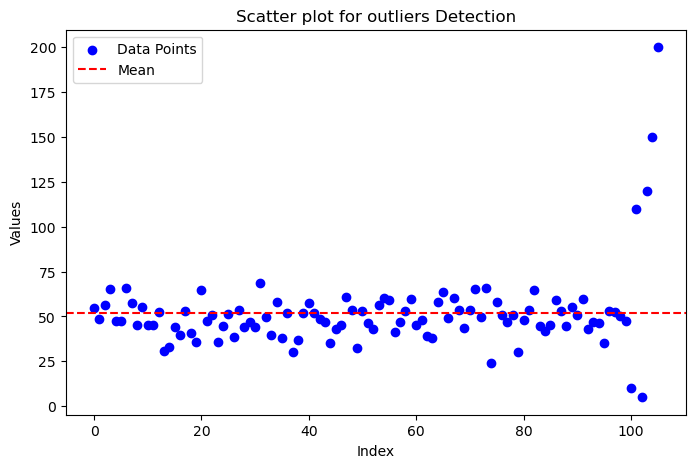

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['values'],color='blue',label='Data Points')
plt.axhline(y=df['values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outliers Detection")
plt.legend()
plt.show()

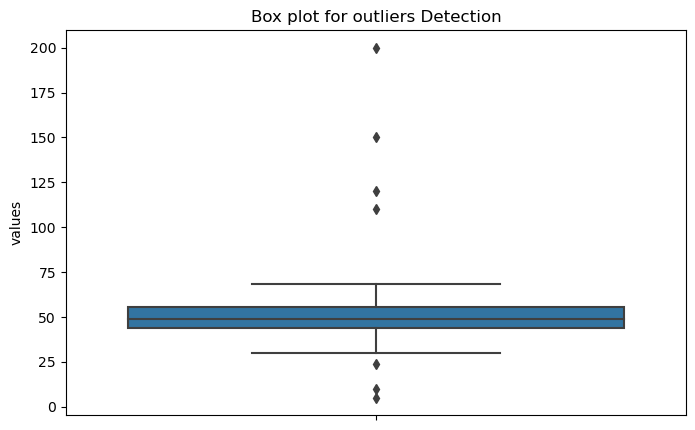

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='values')
plt.title("Box plot for outliers Detection")
plt.show()

In [28]:
#Z-score formula :z = (x-μ)/σ
#x=Data Point
#μ=mean
#σ=standard deviation
# Z-score= values with Z>3 or Z<-3 are outliers
df['Z-score']=zscore(df['values'])
df['Outlier_Z']=df['Z-score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     values   Z-score Outlier_Z
103   120.0  3.062780   Outlier
104   150.0  4.410111   Outlier
105   200.0  6.655661   Outlier


In [29]:
#interquartile Range(IQR) method 
#Q1=25th percentile 
#Q3=75th percentile
#IQR method= values outside [Q1-1.5 * IQR,Q3+1.5 IQR] are outliers
Q1=df['values'].quantile(0.25)
Q3=df['values'].quantile(0.75)
IQR=Q3-Q1

# Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Outlier_IQR']=df['values'].apply(lambda x : 'Outlier' if (x < lower_bound or x > upper_bound) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])

         values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.257543    Normal     Outlier
100   10.000000 -1.877430    Normal     Outlier
101  110.000000  2.613670    Normal     Outlier
102    5.000000 -2.101985    Normal     Outlier
103  120.000000  3.062780   Outlier     Outlier
104  150.000000  4.410111   Outlier     Outlier
105  200.000000  6.655661   Outlier     Outlier



**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.


The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [40]:
# step 1: create a dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)# mean=50 std=10
outliers=np.array([10,110,5,120,150,200])
data=np.concatenate([data,outliers])

#step 2 :compute the 5-number summary
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)

# step 3 :compute IQR
IQR= Q3-Q1
  
#step 4 :compute outliers boundries
lower_bound =Q1 -1.5 *IQR
upper_bound=Q3+1.5 *IQR

#Step 5 :Find Outliers
outliers=data[(data<lower_bound) | (data > upper_bound)]

# step 6 :print results
print(f"5-Number summary:\nMin: {min_value}, Q1: {Q1}, Median(Q2): {Q2},Q3: {Q3},MAx: {max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound:{lower_bound},upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")


5-Number summary:
Min: 5.0, Q1: 43.98560368348251, Median(Q2): 49.061707980157124,Q3: 55.35236890967813,MAx: 200.0
IQR: 11.366765226195618
Lower Bound:26.935455844189082,upper Bound: 72.40251674897155
Outliers: [ 23.80254896  10.         110.           5.         120.
 150.         200.        ]
